# Twitter Data Analysis and Modeling

## Setting up

importing relevant packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer


importnig processing scripts

In [3]:
from extract_dataframe import read_json         # a function to load json_data 
from extract_dataframe import TweetDfExtractor  # and a class to extract relevant variables.    
from clean_tweets_dataframe import Clean_Tweets        # collection of functions to for cleaning the dataframe.

Loading JSON file, selecting relevant variables, and generating a CSV file.

In [4]:
_, tweet_list = read_json("data/Economic_Twitter_Data.json")
tweet = TweetDfExtractor(tweet_list)
tweet.get_tweet_df(True)  # this will also generate a CSV file.
print("Please, load the CSV file")

File Successfully Saved.!!!
Please, load the CSV file


Loading CSV file

In [5]:
tweet_df = pd.read_csv('processed_tweet_data.csv')  # loads the csv file created above.

## Data Cleaning

Running the data cleaning methods from the Clean_Tweets class...!!!

In [13]:
cleaner = Clean_Tweets(tweet_df)
tweet_df = cleaner.drop_unwanted_column(tweet_df)
tweet_df = cleaner.drop_duplicate(tweet_df)
tweet_df = cleaner.convert_to_datetime(tweet_df)
tweet_df = cleaner.convert_to_numbers(tweet_df)
clean_tweet_df = cleaner.remove_non_english_tweets(tweet_df)

Data cleaning in Action...!!!
Unwanted_columns successfully removed
Duplicate rows successfully removed
Strings successfully converted to datetime object
Strings successfully converted to numeric object
Non-English languages succesfully removed


## Data Exploration and Reorganization

In [7]:
clean_tweet_df.shape   # checking the number of columns and rows.

(16374, 17)

In [14]:
clean_tweet_df.info()  # checking available columns, their datatypes and Null count

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16374 entries, 38 to 24622
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          16374 non-null  datetime64[ns, UTC]
 1   source              16374 non-null  object             
 2   original_text       16374 non-null  object             
 3   clean_text          16371 non-null  object             
 4   polarity            16374 non-null  float64            
 5   subjectivity        16374 non-null  float64            
 6   screen_name         16374 non-null  object             
 7   language            16374 non-null  object             
 8   retweet_count       16374 non-null  int64              
 9   friends_count       16374 non-null  int64              
 10  hashtags            16374 non-null  object             
 11  statuses            16374 non-null  int64              
 12  followers_count     16374 non-n

In [9]:
clean_tweet_df.nunique() # checks unique values in each columns

created_at            15675
source                   53
original_text         15082
clean_text            15022
polarity               1047
subjectivity            877
screen_name             464
language                  1
retweet_count          1718
friends_count           394
hashtags               4293
statuses                458
followers_count         426
user_mentions          7939
possibly_sensitive        2
favourites_count        458
location                220
dtype: int64

Insights:<br>
    <li> There are 464 unique users</li>
    <li> There are 220 unique locations.</li>

In [10]:
clean_tweet_df.head()  #checking the top 6 rows.

,created_at,source,original_text,clean_text,polarity,subjectivity,screen_name,language,retweet_count,friends_count,hashtags,statuses,followers_count,user_mentions,possibly_sensitive,favourites_count,location
38,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,The 10-year yield is telling us that there's ...,0.16,0.540000,davideiacovozzi,en,43,55,"[{'text': 'gold', 'indices': [116, 121]}, {'te...",281,18,"[{'screen_name': 'NorthstarCharts', 'name': 'N...",NaN,12179,NaN
39,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,…,0.00,0.000000,davideiacovozzi,en,32,55,[],281,18,"[{'screen_name': 'MichaelAArouet', 'name': 'Mi...",NaN,12179,NaN
41,2022-04-22 06:10:34+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,//t.co/kO2FfHKaZg,0.00,0.000000,davideiacovozzi,en,26,55,[],281,18,"[{'screen_name': 'goldseek', 'name': 'Peter ⚒ ...",False,12179,NaN
42,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,The 30-year mortgage rate in the US rises to ...,0.00,0.183333,davideiacovozzi,en,213,55,[],281,18,"[{'screen_name': 'charliebilello', 'name': 'Ch...",NaN,12179,NaN
43,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,//t.co/brNJeK3WTb,0.00,0.000000,davideiacovozzi,en,417,55,[],281,18,"[{'screen_name': 'biancoresearch', 'name': 'Ji...",False,12179,NaN


In [11]:
clean_tweet_df.describe()   # summarizing numerical columns.

,polarity,subjectivity,retweet_count,friends_count,statuses,followers_count,favourites_count
count,16374.000000,16374.000000,16374.000000,16374.000000,1.637400e+04,1.637400e+04,16374.000000
mean,0.083105,0.295141,627.341151,1337.912056,4.503068e+04,5.359397e+04,22503.216563
std,0.271508,0.314911,7104.387606,2975.315626,1.473958e+05,4.328630e+05,49450.473604
min,-1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,113.000000,1.610000e+03,1.120000e+02,542.000000
50%,0.000000,0.233333,2.000000,437.000000,7.322000e+03,5.430000e+02,4295.000000
75%,0.200000,0.500000,34.000000,1433.000000,3.159900e+04,2.131000e+03,20269.000000
max,1.000000,1.000000,434379.000000,41866.000000,2.307455e+06,6.027402e+06,529419.000000


selection and reorganization of variables

In [16]:
# selecting only the relevant variables for further analysis
clean_tweet_df = clean_tweet_df.drop(['original_text', 'source', 'user_mentions', 'possibly_sensitive'], axis=1)
clean_tweet_df = clean_tweet_df.dropna() # droping rows with null values
clean_tweet_df.info()

KeyError: "['original_text', 'source', 'user_mentions', 'possibly_sensitive'] not found in axis"

creating a new variable: sentiment

In [108]:
def sentiment_group (p): # a function used to represent polarity values in string
  if p > 0:
    return 'positive'
  elif p < 0:
    return 'negative'
  else:
    return 'neutral'

In [109]:
sentiment = pd.Series([sentiment_group(row_val) for row_val in clean_tweet_df['polarity']])

In [110]:
clean_tweet_df = pd.concat([clean_tweet_df, sentiment.rename("sentiment")], axis=1)


### Analysis and Visualization


Location based explorations

In [ ]:
df["source"].value_counts().head(5).plot(kind="pie");

In [ ]:
plt.scatter(df.retweet_count, df.favorite_count)

In [106]:
# loading countries basic information module and extracting african countries
from countries_info import countries
african_countries = []
for item in countries:
    if item['continent'] == 'Africa':
        african_countries.append(item['name'])
        african_countries.append(item['capital'])
    

# extracting countries from africa 
ava_countries = {}
for item in clean_tweet_df.location:
    if item in african_countries:
        if item not in ava_countries:
            ava_countries[item] = 1
        else:
            ava_countries[item] = ava_countries[item]+1

print("\ntweet_count summary by african countries\n")
# the count of tweets in association with each african countries.            
afr_df = pd.DataFrame ({ 'places': ava_countries.keys(), 'tweet_count': ava_countries.values()})
afr_df.sort_values(by=['tweet_count'], inplace=True, ascending = False)
afr_df['percentage'] = ((afr_df['tweet_count']/clean_tweet_df.shape[0])*100).round(1)
print("\n",afr_df, "\n")

# the tweet dataframe filtered by african countries
afr_list = list(ava_countries.keys())
afr_tweets_df = clean_tweet_df[clean_tweet_df['location'].isin(afr_list)]

print("tweet count summary by top 10 global countries\n")

top_loc = clean_tweet_df.groupby(['location']).size().sort_values(ascending=False).to_frame().reset_index().head(10)
top_loc.columns = ['places', 'tweet_count']
top_loc['percentage'] = ((top_loc['tweet_count']/clean_tweet_df.shape[0])*100).round(1)

print(top_loc)
#top_locations.plot(kind="pie", subplots=True, title="Top 5 locations of users");
    



tweet_count summary by african countries


          places  tweet_count  percentage
2         Kenya          133         0.6
0  South Africa           93         0.4
1       Namibia           41         0.2
3     Mauritius           25         0.1 

tweet count summary by top 10 global countries

            places  tweet_count  percentage
0            India          519         2.4
1    United States          254         1.2
2        Sri Lanka          228         1.0
3  London, England          195         0.9
4           Canada          193         0.9
5        New Delhi          172         0.8
6           Mumbai          144         0.7
7             Mars          143         0.7
8            Kenya          133         0.6
9   Chennai, India          113         0.5


C:\Users\IRONMAN\AppData\Local\Temp\ipykernel_11768\2198791810.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45)


[Text(0, 0, 'India'),
 Text(1, 0, 'United States'),
 Text(2, 0, 'Sri Lanka'),
 Text(3, 0, 'London, England'),
 Text(4, 0, 'Canada'),
 Text(5, 0, 'New Delhi'),
 Text(6, 0, 'Mumbai'),
 Text(7, 0, 'Mars'),
 Text(8, 0, 'Kenya'),
 Text(9, 0, 'Chennai, India')]

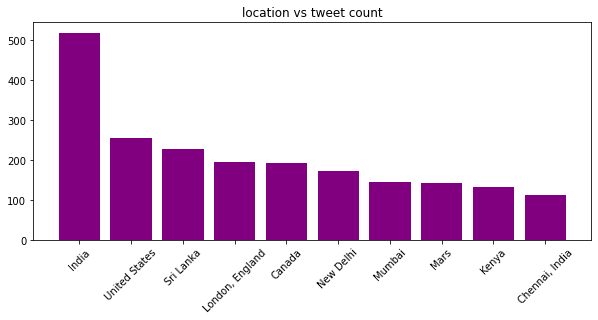

In [107]:
labels = list(top_loc['places'])

fig, ax = plt.subplots(1, 1, figsize = (10,4))

ax.bar(x=labels, height=list(top_loc['tweet_count']), color='purple')
ax.set_title('location vs tweet count')
ax.set_xticklabels(labels, rotation=45)


exploring the sentiment in africa

In [124]:
gr_afr = afr_tweets_df.groupby(['location', 'sentiment']).size().to_frame().reset_index()
gr_afr.columns=['location','sentiment', 'count']
print(gr_afr)
# grouping by country and sentiment
#afr_tweets_df.groupby(['location', 'sentiment']).size().groupby(level=1).max() # grouping by country and sentiment


       location sentiment  count
0         Kenya  negative      9
1         Kenya   neutral     23
2         Kenya  positive     61
3       Namibia  negative      5
4       Namibia   neutral     24
5       Namibia  positive     12
6  South Africa  negative     11
7  South Africa   neutral     19
8  South Africa  positive     18


In [125]:
gr_all = clean_tweet_df.groupby(['location', 'sentiment']).size().to_frame().reset_index()
gr_all.columns=['location','sentiment', 'count']
print(gr_all)

ValueError: Grouper for 'sentiment' not 1-dimensional

In [126]:

labels = ['neutral', 'positive', 'negative']
positive = len(clean_tweet_df[clean_tweet_df['sentiment'] == "positive"])
negative = len(clean_tweet_df[clean_tweet_df['sentiment'] == "negative"])
neutral = len(clean_tweet_df[clean_tweet_df['sentiment'] == "neutral"])

fig, ax = plt.subplots(1, 1, figsize = (10,4))

ax.bar(x=labels, height=[negative, positive, neutral], color='blue')
ax.set_title('Barchart of sentiment column')
ax.set_xticklabels(labels, rotation=90)

fig.suptitle('sentiment column plots')

C:\Users\IRONMAN\AppData\Local\Temp\ipykernel_11768\1583420609.py:2: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  positive = len(clean_tweet_df[clean_tweet_df['sentiment'] == "positive"])


ValueError: cannot reindex on an axis with duplicate labels

In [127]:
clean_tweet_df.groupby('sentiment')['clean_text'].count()

ValueError: Grouper for 'sentiment' not 1-dimensional

## Sentiment analysis and modeling

In [ ]:
len(clean_tweet_df['polarity'])

In [ ]:
clean_tweet_df = clean_tweet_df.drop(clean_tweet_df[clean_tweet_df.sentiment == 'neutral'].index)

In [ ]:
clean_tweet_df.head()

In [ ]:
valueArray = pd.Series([1 if row_val == 'positive' else 0 for row_val in clean_tweet_df['sentiment']])

In [ ]:
clean_tweet_df['valueArray'] = valueArray

In [ ]:
clean_tweet_df.head()

In [ ]:
X = clean_tweet_df['original_text']
y = clean_tweet_df['valueArray']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

In [ ]:
count_vect = CountVectorizer()
X_train = X_train.replace(np.nan, '', regex=True)
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts = X_train_counts.toarray()

In [ ]:
y_train = y_train.fillna(0)

In [ ]:
# scaling the input
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=9000, tol=1e-2))

In [ ]:
clf.fit(X_train_counts, y_train)

In [ ]:
X_test = X_test.replace(np.nan, '', regex=True)
# use transform not fit_transform
X_test_counts = count_vect.transform(X_test)
X_test_counts = X_test_counts.toarray()
# prediction = clf.prevaluedict(X_test_counts)
prediction = clf.predict(X_test_counts)

In [ ]:
# making prediction
prediction = clf.predict(X_test_counts)

In [ ]:
np.mean(prediction == y_test)